# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob 
import pickle

## Camera Calibration using Chessboard Images

In [27]:
def camera_cal(nx=9, ny=6):
    
    # load chessboard images for calibration
    images = glob.glob('camera_cal/cal*.jpg')

    # Arrays to store object points and image points from images
    objpoints = [] # 3d points in real world space.
    imgpoints = [] # 2d points in image plane.

    # Prepare object points
    objp = np.zeros((6*9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Find chessboard corners
    for image in images[:-1]:

        # Load image
        img = mpimg.imread(image)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        # If found, add object points and image points
        if ret:
            imgpoints.append(corners)
            objpoints.append(objp)
    
    # Load image for calibration
    img = mpimg.imread(images[-1])
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
   
    # Calibrate camera using object and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[1::-1], None, None)
    
    # Undistort image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(undist, (9, 6), None)
    
    # If found, draw corners and perform perspective transform
    if ret:
        cv2.drawChessboardCorners(undist, (8, 6), corners, ret)
        
        # Set offset
        offset = 100
        
        img_size = (undist.shape[1], undist.shape[0])
        
        # Set source points
        src = np.float32([
            corners[0],
            corners[nx-1],
            corners[-1],
            corners[-nx]
        ])
        
        # Set destination points
        dst = np.float32([
            [offset, offset],
            [img_size[0]-offset, offset],
            [img_size[0]-offset, img_size[1]-offset],
            [offset, img_size[1]-offset]
        ])
        
        # Perform perspective transform
        M = cv2.getPerspectiveTransform(src, dst)
        
        # Warp image
        warped = cv2.warpPerspective(undist, M, img_size)
        
        return img, warped, M

In [28]:
img, warped, M = camera_cal()

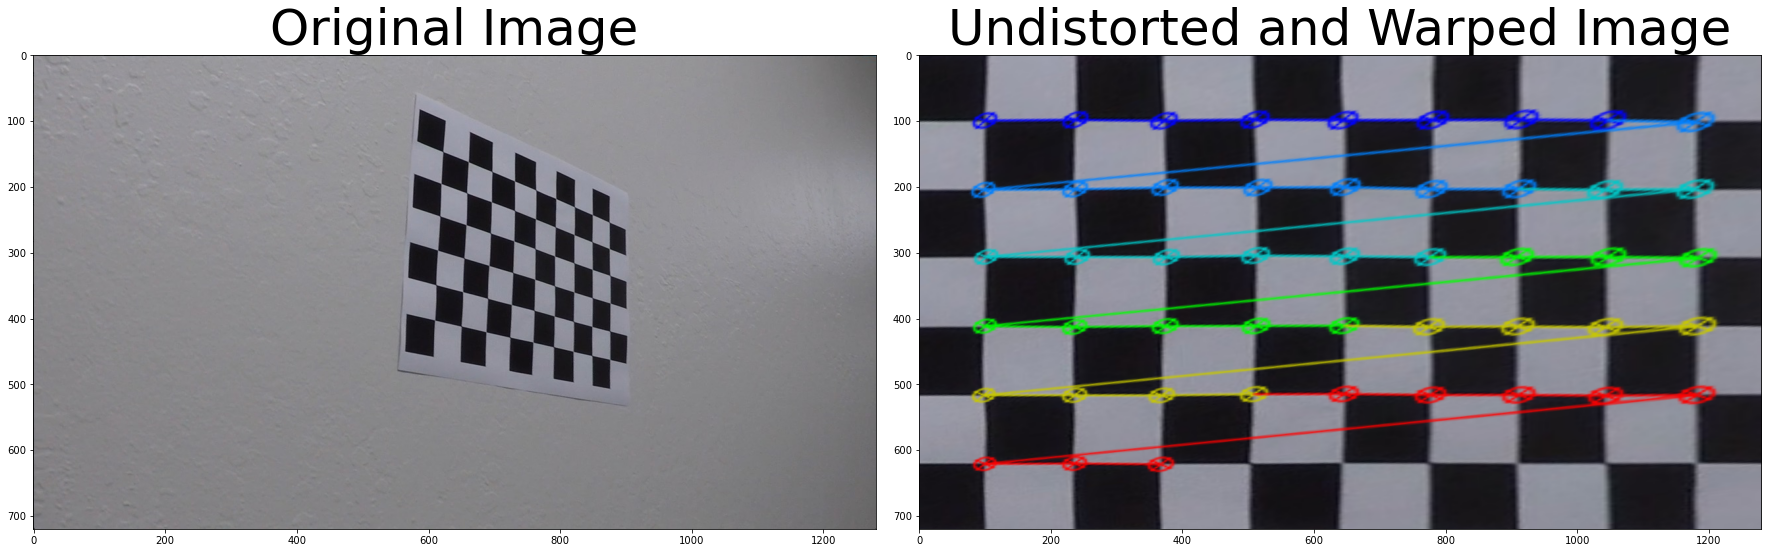

In [29]:
%matplotlib inline 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=.0, right=1, top=0.9, bottom=0.)